My mini project
Video Game Sales Analysis

Data set: Video Game Sales 
Site: https://www.kaggle.com/datasets/gregorut/videogamesales

Why I chose it - I’m interested in the video game industry and wanted to explore how regional sales relate to global success.

My Goal - The goal of this project is to predict a game’s *Global Sales* based on its *North American Sales* using a simple linear regression model.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("vgsales.csv")
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The dataset contains 16,598 rows and 11 columns.There are some missing values in the Year and Publisher columns,but for this simple project we will focus only on numeric sales data, which is complete.

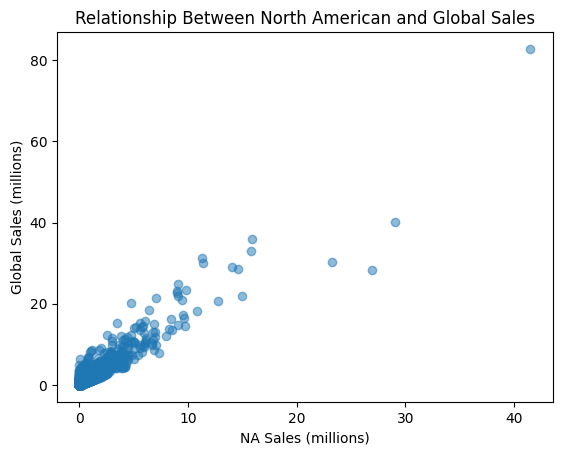

In [7]:
plt.scatter(df["NA_Sales"], df["Global_Sales"], alpha=0.5)
plt.title("Relationship Between North American and Global Sales")
plt.xlabel("NA Sales (millions)")
plt.ylabel("Global Sales (millions)")
plt.show()


This scatter plot shows a clear positive correlation games that sell well in North America usually sell well globally too.

In [8]:
X = df[["NA_Sales"]]
y = df["Global_Sales"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


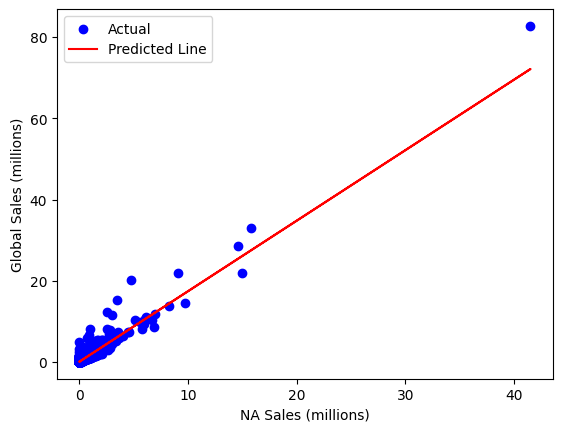

In [11]:
predictions = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, predictions, color='red', label="Predicted Line")
plt.xlabel("NA Sales (millions)")
plt.ylabel("Global Sales (millions)")
plt.legend()
plt.show()

The model shows a strong positive relationship between North American sales and global sales. As NA_Sales increase, Global_Sales tend to rise as well. However, since this model uses only one feature, it cannot capture the influence of other factors like platform, year, or publisher. In future versions, I could include more features to build a more accurate predictive model.